# Comparative Analysis of Energy Consumption in Cryptomining for Environment Sustainability

<hr>

### Team information
**1. Ayushi Sharma  (6th /3rd Year)** <br>
**2. Harsh Bamotra  (3rd /2nd Year)** <br>
**3. Pratham Sharma (3rd /2nd Year)** <br>

Supervisor    : **Prof. Vibha Gaur** <br>
Course        : **BSc. (H) Computer Science** <br>
College       : **Acharya Narendra Dev College** <br>

Importing required libraries

In [1]:
import numpy as np
import pandas as pd

Reading the following csv files:

1. n-transactions-per-block.csv ----- Number of transaction per block
2. fees-usd-per-transaction.csv ----- Fees per transaction 
3. Bitcoin.csv ---------------------- Bitcoin market price 
4. ethereum-energy-consumpt.csv ----- Ethereum power consumption

In [2]:
T = pd.read_csv("n-transactions-per-block.csv")
T_Fees = pd.read_csv("cost-per-transaction.csv")
market_price = pd.read_csv("Bitcoin.csv")
eth_PC = pd.read_csv("ethereum-energy-consumpt.csv")

T.Timestamp = pd.to_datetime(T.Timestamp , format="%Y%m%")
T_Fees.Timestamp = pd.to_datetime(T_Fees.Timestamp , format="%Y%m%")
market_price.Date = pd.to_datetime(market_price.Date , format="%Y%m%")
eth_PC.DateTime = pd.to_datetime(eth_PC.DateTime , format="%Y%m%")

### Bitcoin power consumption

Extracting data of year 2020 and handling missing values

In [3]:
T1 = T[T["Timestamp"].dt.year >= 2015].copy()
T1_Fees = T_Fees[T_Fees["Timestamp"].dt.year >= 2015].copy()

df01 = pd.DataFrame()
df01["Timestamp"] = pd.date_range(start ='01-01-2015', end ='31-12-2021', freq ='24H')
for i in df01.index:
    for j in T1.index:
        if(df01.loc[i , "Timestamp"] == T1.loc[j , "Timestamp"]):
            df01.loc[i , "No._of_Transactions_per_block"] = T1.loc[j , "n-transactions-per-block"]
            df01.loc[i , "Fee_per_Transaction(USD)"] = T1_Fees.loc[j , "cost-per-transaction"]
            
df01 = df01.fillna(method = "ffill")
df01 = df01.fillna(method = "bfill")
df01

,Timestamp,No._of_Transactions_per_block,Fee_per_Transaction(USD)
0,2015-01-01,359.660606,22.138294
1,2015-01-02,359.660606,22.138294
2,2015-01-03,359.660606,22.138294
3,2015-01-04,498.220930,16.289939
4,2015-01-05,498.220930,16.289939
...,...,...,...
2552,2021-12-27,1413.625850,226.700795
2553,2021-12-28,1980.761194,163.363249
2554,2021-12-29,1980.761194,163.363249
2555,2021-12-30,1980.761194,163.363249


- The block time of Bitcoin is 10 min and therefore total 144 blocks can be added and verified in a day.
- Calculating total transactions and total transaction fee per day.

In [4]:
df01["Total_Transactions"] = df01["No._of_Transactions_per_block"]*144
df01["Total_Transaction_fees"] = df01["Total_Transactions"]*df01["Fee_per_Transaction(USD)"]
df01

,Timestamp,No._of_Transactions_per_block,Fee_per_Transaction(USD),Total_Transactions,Total_Transaction_fees
0,2015-01-01,359.660606,22.138294,51791.127273,1.146567e+06
1,2015-01-02,359.660606,22.138294,51791.127273,1.146567e+06
2,2015-01-03,359.660606,22.138294,51791.127273,1.146567e+06
3,2015-01-04,498.220930,16.289939,71743.813953,1.168702e+06
4,2015-01-05,498.220930,16.289939,71743.813953,1.168702e+06
...,...,...,...,...,...
2552,2021-12-27,1413.625850,226.700795,203562.122449,4.614769e+07
2553,2021-12-28,1980.761194,163.363249,285229.611940,4.659604e+07
2554,2021-12-29,1980.761194,163.363249,285229.611940,4.659604e+07
2555,2021-12-30,1980.761194,163.363249,285229.611940,4.659604e+07


Adding bitcoin market price and block reward

In [5]:
DF5 = market_price[market_price["Date"].dt.year >=2015].copy()
DF5 = DF5[DF5["Date"].dt.year <=2021].copy()
DF5 = DF5.reset_index(drop=True)

for i in df01.index:
    if(df01.loc[i , "Timestamp"] == DF5.loc[i , "Date"]):
        df01.loc[i , "Market_price"] = (DF5.loc[i , "High"]+DF5.loc[i , "Low"])/2
    
d1 = pd.to_datetime("2012-11-28")
d2 = pd.to_datetime("2016-07-09")
d3 = pd.to_datetime("2020-05-11")

for i in df01.index:
    if(df01.loc[i , "Timestamp"]<d1):
        df01.loc[i , "Block_Reward(BTC)"] = 50
        df01.loc[i , "Block_Reward(USD)"] = 50*df01.loc[i , "Market_price"]
    elif(df01.loc[i , "Timestamp"]>=d1 and df01.loc[i , "Timestamp"]<d2):
        df01.loc[i , "Block_Reward(BTC)"] = 25
        df01.loc[i , "Block_Reward(USD)"] = 25*df01.loc[i , "Market_price"]
    elif(df01.loc[i , "Timestamp"]>=d2 and df01.loc[i , "Timestamp"]<d3):
        df01.loc[i , "Block_Reward(BTC)"] = 12.5
        df01.loc[i , "Block_Reward(USD)"] = 12.5*df01.loc[i , "Market_price"]
    else:
        df01.loc[i , "Block_Reward(BTC)"] = 6.25
        df01.loc[i , "Block_Reward(USD)"] = 6.25*df01.loc[i , "Market_price"]
df01

,Timestamp,No._of_Transactions_per_block,Fee_per_Transaction(USD),Total_Transactions,Total_Transaction_fees,Market_price,Block_Reward(BTC),Block_Reward(USD)
0,2015-01-01,359.660606,22.138294,51791.127273,1.146567e+06,317.218995,25.00,7930.474863
1,2015-01-02,359.660606,22.138294,51791.127273,1.146567e+06,314.701996,25.00,7867.549888
2,2015-01-03,359.660606,22.138294,51791.127273,1.146567e+06,298.115997,25.00,7452.899937
3,2015-01-04,498.220930,16.289939,71743.813953,1.168702e+06,272.421005,25.00,6810.525137
4,2015-01-05,498.220930,16.289939,71743.813953,1.168702e+06,271.712509,25.00,6792.812725
...,...,...,...,...,...,...,...,...
2552,2021-12-27,1413.625850,226.700795,203562.122449,4.614769e+07,51227.898438,6.25,320174.365234
2553,2021-12-28,1980.761194,163.363249,285229.611940,4.659604e+07,49047.035157,6.25,306543.969728
2554,2021-12-29,1980.761194,163.363249,285229.611940,4.659604e+07,47160.619141,6.25,294753.869631
2555,2021-12-30,1980.761194,163.363249,285229.611940,4.659604e+07,46970.138672,6.25,293563.366700


Calculating total revenue and power consumption
- Assuming that 60% of the revenue was spend on electricity
- Taking the average unit price 0.05 (USD/Kwh)

In [6]:
df01["Total_revenue"]  = df01["Total_Transaction_fees"] + df01["Block_Reward(USD)"]
df01["Power_Consumption"] = df01["Total_revenue"]*(.6)/(0.05)
df01

,Timestamp,No._of_Transactions_per_block,Fee_per_Transaction(USD),Total_Transactions,Total_Transaction_fees,Market_price,Block_Reward(BTC),Block_Reward(USD),Total_revenue,Power_Consumption
0,2015-01-01,359.660606,22.138294,51791.127273,1.146567e+06,317.218995,25.00,7930.474863,1.154498e+06,1.385397e+07
1,2015-01-02,359.660606,22.138294,51791.127273,1.146567e+06,314.701996,25.00,7867.549888,1.154435e+06,1.385322e+07
2,2015-01-03,359.660606,22.138294,51791.127273,1.146567e+06,298.115997,25.00,7452.899937,1.154020e+06,1.384824e+07
3,2015-01-04,498.220930,16.289939,71743.813953,1.168702e+06,272.421005,25.00,6810.525137,1.175513e+06,1.410615e+07
4,2015-01-05,498.220930,16.289939,71743.813953,1.168702e+06,271.712509,25.00,6792.812725,1.175495e+06,1.410594e+07
...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,1413.625850,226.700795,203562.122449,4.614769e+07,51227.898438,6.25,320174.365234,4.646787e+07,5.576144e+08
2553,2021-12-28,1980.761194,163.363249,285229.611940,4.659604e+07,49047.035157,6.25,306543.969728,4.690258e+07,5.628310e+08
2554,2021-12-29,1980.761194,163.363249,285229.611940,4.659604e+07,47160.619141,6.25,294753.869631,4.689079e+07,5.626895e+08
2555,2021-12-30,1980.761194,163.363249,285229.611940,4.659604e+07,46970.138672,6.25,293563.366700,4.688960e+07,5.626752e+08


In [7]:
Bit_APC = pd.DataFrame()
Bit_APC["Years"] = ["2015" , "2016" , "2017" , "2018" , "2019" , "2020" , "2021"]
Bit_APC["Power_Consumption (Twh)"] = df01.groupby(df01["Timestamp"].dt.year, as_index=False).agg({"Power_Consumption" : "sum"})
Bit_APC["Power_Consumption (Twh)"] = Bit_APC["Power_Consumption (Twh)"]/10**9
Bit_APC

,Years,Power_Consumption (Twh)
0,2015,4.597011
1,2016,6.684986
2,2017,37.165882
3,2018,63.409924
4,2019,60.213413
5,2020,59.627897
6,2021,200.828210


### Ethereum Power Consumption

In [8]:
Eth_APC = pd.DataFrame()
eth_PC = eth_PC[eth_PC["DateTime"].dt.year <=2021].copy()
Eth_APC["Years"] = ["2017" , "2018" , "2019" , "2020" , "2021"]
Eth_APC["Power_Consumption (Twh)"] = eth_PC.groupby(eth_PC["DateTime"].dt.year, as_index=False).agg({"Estimated TWh per Year" : "mean"})
Eth_APC

,Years,Power_Consumption (Twh)
0,2017,6.165374
1,2018,16.881881
2,2019,7.920308
3,2020,9.072771
4,2021,54.968305


## Carbon footprint

In [9]:
def emission(B4):
    y = B4*(10**9)
    x =y*(0.3379*820 + 0.228*490 + 0.1685*24 + 0.1012*12 + 0.0615*11 + 0.0437*490 + 0.0327+39 + 0.027*134)/(10**12)
    return x

In [10]:
Bit_CF = Bit_APC[Bit_APC["Years"] >= "2017"].copy()
Bit_CF["Footprint (Mt CO2)"] = Bit_CF["Power_Consumption (Twh)"].apply(emission)
Bit_CF

,Years,Power_Consumption (Twh),Footprint (Mt CO2)
2,2017,37.165882,17.051580
3,2018,63.409924,29.092258
4,2019,60.213413,27.625709
5,2020,59.627897,27.357076
6,2021,200.828210,92.139300


In [11]:
Eth_CF = Eth_APC.copy()
Eth_CF["Footprint (Mt CO2)"] = Eth_CF["Power_Consumption (Twh)"].apply(emission)
Eth_CF

,Years,Power_Consumption (Twh),Footprint (Mt CO2)
0,2017,6.165374,2.828653
1,2018,16.881881,7.745349
2,2019,7.920308,3.633810
3,2020,9.072771,4.162557
4,2021,54.968305,25.219271


### Carbon emission  yearly % increase

In [24]:
Eth_CF.to_csv("Eth_CF.csv")
Bit_CF.to_csv("Bit_CF.csv")

## Graphs 

1. Which country is contributing how much in power consumption and carbon footprint. (Hashrate graphs country wise)
2. Annaul revenue generated
3. Annual power consumption and annual carbon footprint of bitcoin and ethereum (line chart).

In [12]:
import matplotlib.pyplot as pt

### Power Consumption Bitcoin vs Ethereum

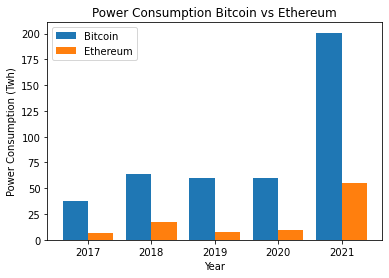

In [13]:
X = Bit_CF["Years"]
Y = Bit_CF["Power_Consumption (Twh)"]
Z = Eth_CF["Power_Consumption (Twh)"]
  
X_axis = np.arange(len(X))
  
pt.bar(X_axis - 0.2, Y, 0.4, label = 'Bitcoin')
pt.bar(X_axis + 0.2, Z, 0.4, label = 'Ethereum')
  
pt.xticks(X_axis, X)
pt.xlabel("Year")
pt.ylabel("Power Consumption (Twh)")
pt.title("Power Consumption Bitcoin vs Ethereum")
pt.legend()
pt.show()

### Carbon emission Bitcoin vs Ethereum

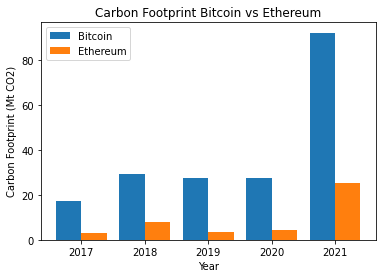

In [14]:
X = Bit_CF["Years"]
Y = Bit_CF["Footprint (Mt CO2)"]
Z = Eth_CF["Footprint (Mt CO2)"]
  
X_axis = np.arange(len(X))
  
pt.bar(X_axis - 0.2, Y, 0.4, label = 'Bitcoin')
pt.bar(X_axis + 0.2, Z, 0.4, label = 'Ethereum')
  
pt.xticks(X_axis, X)
pt.xlabel("Year")
pt.ylabel("Carbon Footprint (Mt CO2)")
pt.title("Carbon Footprint Bitcoin vs Ethereum")
pt.legend()
pt.show()

### Total revenue earned by the miners yearly

In [15]:
Annual_Revenue = pd.DataFrame()
Annual_Revenue["Years"] = ["2015" , "2016" , "2017" , "2018" , "2019" , "2020" , "2021"]
Annual_Revenue["Total_Revenue"] = df01.groupby(df01["Timestamp"].dt.year, as_index=False).agg({"Total_revenue" : "sum"})
Annual_Revenue

,Years,Total_Revenue
0,2015,3.830842e+08
1,2016,5.570822e+08
2,2017,3.097157e+09
3,2018,5.284160e+09
4,2019,5.017784e+09
5,2020,4.968991e+09
6,2021,1.673568e+10


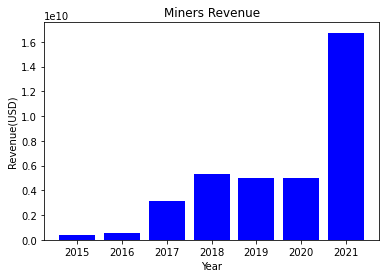

In [16]:
y=np.arange(len(Annual_Revenue["Years"]))
x=Annual_Revenue["Total_Revenue"]
pt.bar(y,x,align='center',color='blue')
pt.xticks(y,Annual_Revenue["Years"])
pt.ylabel('Revenue(USD)')
pt.xlabel('Year')
pt.title("Miners Revenue")
pt.show()

### Annual power consumption 

In [17]:
Annual_PC = pd.DataFrame()
Annual_PC["Years"] = ["2015" , "2016" , "2017" , "2018" , "2019" , "2020" , "2021"]
Annual_PC["Power_Consumption"] = df01.groupby(df01["Timestamp"].dt.year, as_index=False).agg({"Power_Consumption" : "sum"})
Annual_PC["Power_Consumption"] = Annual_PC["Power_Consumption"]/10**9
Annual_PC

,Years,Power_Consumption
0,2015,4.597011
1,2016,6.684986
2,2017,37.165882
3,2018,63.409924
4,2019,60.213413
5,2020,59.627897
6,2021,200.828210


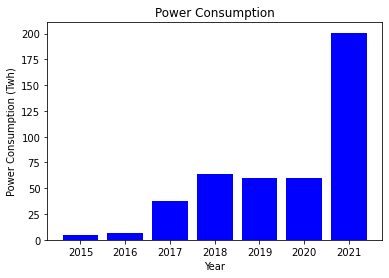

In [18]:
y=np.arange(len(Annual_PC["Years"]))
x=Annual_PC["Power_Consumption"]
pt.bar(y,x,align='center',color='blue')
pt.xticks(y,Annual_PC["Years"])
pt.ylabel('Power Consumption (Twh)')
pt.xlabel('Year')
pt.title("Power Consumption")
pt.show()

### Power Consumption 

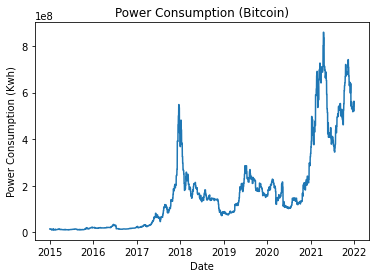

In [19]:
pt.plot(df01["Timestamp"] , df01["Power_Consumption"])
pt.ylabel('Power Consumption (Kwh)')
pt.xlabel('Date')
pt.title("Power Consumption (Bitcoin)")
pt.show()

### Miners Revenue

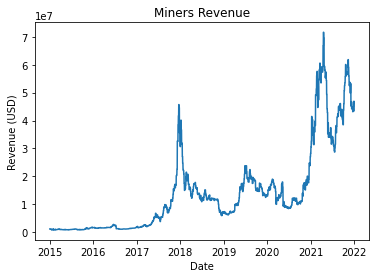

In [20]:
pt.plot(df01["Timestamp"] , df01["Total_revenue"])
pt.ylabel('Revenue (USD)')
pt.xlabel('Date')
pt.title("Miners Revenue")
pt.show()

### Bitcoin price vs Energy consumption

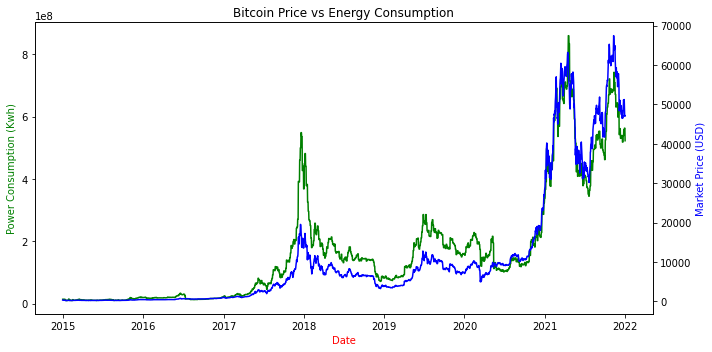

In [21]:
x = df01["Timestamp"]
y1 = df01["Power_Consumption"]
y2 = df01["Market_price"]
fig, ax = pt.subplots(figsize = (10, 5))
pt.title('Bitcoin Price vs Energy Consumption')
ax2 = ax.twinx()
ax.plot(x, y1, color = 'g')
ax2.plot(x, y2, color = 'b')
ax.set_xlabel('Date', color = 'r')
ax.set_ylabel('Power Consumption (Kwh)', color = 'g')
ax2.set_ylabel('Market Price (USD)', color = 'b')
pt.tight_layout()
pt.show()